In [1]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [2]:
df_train = pd.read_csv("./dataset/train_features.csv")
df_test = pd.read_csv("./dataset/test_features.csv")

In [3]:
df_train

,letter_slant,line_slant,margin_slope,word_spacing,personality
0,vertical,upperside,straight,small,Agreeableness
1,backward,lowerside,right,medium,Agreeableness
2,forward,baseline,straight,small,Agreeableness
3,forward,upperside,straight,small,Agreeableness
4,backward,baseline,straight,small,Agreeableness
...,...,...,...,...,...
172,forward,upperside,right,small,Openness
173,forward,baseline,right,medium,Openness
174,forward,upperside,straight,medium,Openness
175,forward,upperside,straight,small,Openness


In [4]:
df_test

,letter_slant,line_slant,margin_slope,word_spacing,personality
0,vertical,baseline,left,small,Agreeableness
1,vertical,baseline,right,medium,Agreeableness
2,forward,baseline,left,large,Agreeableness
3,vertical,baseline,right,large,Agreeableness
4,vertical,upperside,left,small,Agreeableness
5,vertical,baseline,straight,large,Agreeableness
6,vertical,baseline,straight,large,Agreeableness
7,vertical,baseline,left,large,Agreeableness
8,forward,baseline,right,large,Conscientiousness
9,backward,baseline,left,large,Conscientiousness


In [5]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   letter_slant  177 non-null    object
 1   line_slant    177 non-null    object
 2   margin_slope  177 non-null    object
 3   word_spacing  177 non-null    object
 4   personality   177 non-null    object
dtypes: object(5)
memory usage: 7.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   letter_slant  44 non-null     object
 1   line_slant    44 non-null     object
 2   margin_slope  44 non-null     object
 3   word_spacing  44 non-null     object
 4   personality   44 non-null     object
dtypes: object(5)
memory usage: 1.8+ KB
None


In [6]:
df_train.isnull().sum()

letter_slant    0
line_slant      0
margin_slope    0
word_spacing    0
personality     0
dtype: int64

In [7]:
df_test.isnull().sum()

letter_slant    0
line_slant      0
margin_slope    0
word_spacing    0
personality     0
dtype: int64

In [8]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [9]:
map_dict = {
    val: key
    for key, val in enumerate(df_train['letter_slant'].unique())
}
df_train['letter_slant'] = df_train['letter_slant'].map(map_dict)
df_test['letter_slant'] = df_test['letter_slant'].map(map_dict)

map_dict = {
    val: key
    for key, val in enumerate(df_train['line_slant'].unique())
}
df_train['line_slant'] = df_train['line_slant'].map(map_dict)
df_test['line_slant'] = df_test['line_slant'].map(map_dict)

map_dict = {
    val: key
    for key, val in enumerate(df_train['margin_slope'].unique())
}
df_train['margin_slope'] = df_train['margin_slope'].map(map_dict)
df_test['margin_slope'] = df_test['margin_slope'].map(map_dict)

map_dict = {
    val: key
    for key, val in enumerate(df_train['word_spacing'].unique())
}
df_train['word_spacing'] = df_train['word_spacing'].map(map_dict)
df_test['word_spacing'] = df_test['word_spacing'].map(map_dict)

df_train

,letter_slant,line_slant,margin_slope,word_spacing,personality
0,0,0,0,0,Agreeableness
1,1,1,1,1,Agreeableness
2,2,2,0,0,Agreeableness
3,2,0,0,0,Agreeableness
4,1,2,0,0,Agreeableness
...,...,...,...,...,...
172,2,0,1,0,Openness
173,2,2,1,1,Openness
174,2,0,0,1,Openness
175,2,0,0,0,Openness


In [10]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   letter_slant  177 non-null    int64 
 1   line_slant    177 non-null    int64 
 2   margin_slope  177 non-null    int64 
 3   word_spacing  177 non-null    int64 
 4   personality   177 non-null    object
dtypes: int64(4), object(1)
memory usage: 7.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   letter_slant  44 non-null     int64 
 1   line_slant    44 non-null     int64 
 2   margin_slope  44 non-null     int64 
 3   word_spacing  44 non-null     int64 
 4   personality   44 non-null     object
dtypes: int64(4), object(1)
memory usage: 1.8+ KB
None


In [11]:
x_train = df_train.drop('personality', axis=1)
y_train = df_train['personality']
x_test = df_test.drop('personality', axis=1)
y_test = df_test['personality']

In [12]:
dtree = DecisionTreeClassifier()
dtree_res = dtree.fit(x_train, y_train)

In [13]:
y_pred = dtree.predict(x_test)
print(y_pred)

['Openness' 'Agreeableness' 'Neuroticism' 'Openness' 'Conscientiousness'
 'Openness' 'Openness' 'Openness' 'Openness' 'Agreeableness' 'Neuroticism'
 'Openness' 'Openness' 'Agreeableness' 'Openness' 'Openness' 'Openness'
 'Openness' 'Neuroticism' 'Openness' 'Openness' 'Extraversion'
 'Agreeableness' 'Neuroticism' 'Openness' 'Openness' 'Neuroticism'
 'Conscientiousness' 'Openness' 'Neuroticism' 'Conscientiousness'
 'Neuroticism' 'Agreeableness' 'Agreeableness' 'Conscientiousness'
 'Openness' 'Extraversion' 'Agreeableness' 'Agreeableness' 'Openness'
 'Openness' 'Neuroticism' 'Conscientiousness' 'Agreeableness']


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.1590909090909091

In [15]:
dtree.feature_importances_

array([0.37069785, 0.24349597, 0.13854524, 0.24726093])

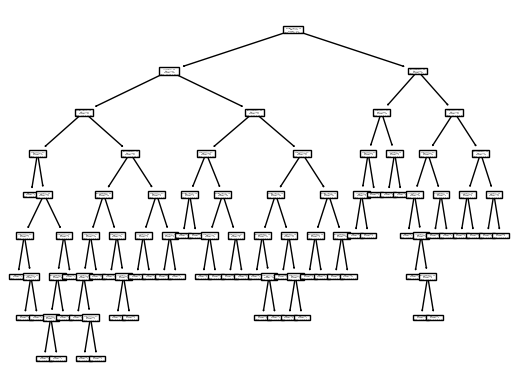

In [16]:
tree.plot_tree(dtree_res, feature_names=list(df_test.columns))
# plt.savefig(sys.stdout.buffer)
sys.stdout.flush()